In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('3.12. Example.csv')

In [3]:
import os
os.getcwd()

'C:\\Users\\admin'

In [4]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


Text(0, 0.5, 'Loyalty')

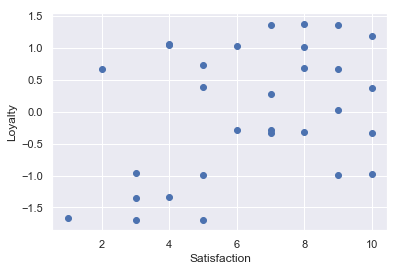

In [5]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [6]:
x = data.copy()

In [7]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
clusters = x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

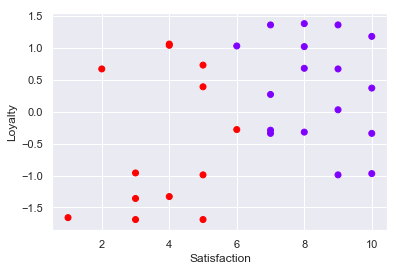

In [9]:
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [10]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [11]:
wcss=[]

for i in range (1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
wcss

[229.16347000000002,
 74.54254375000001,
 49.46793333333333,
 35.52453035714285,
 26.861604166666666,
 22.07582523809523,
 18.070350238095237,
 14.720321666666665,
 11.110593333333332]

Text(0, 0.5, 'wcss')

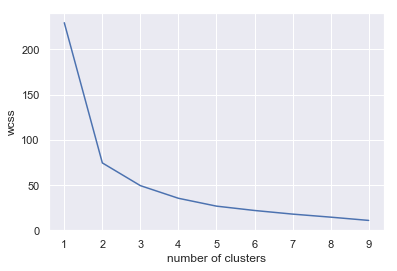

In [12]:
plt.plot(range(1,10),wcss)
plt.xlabel('number of clusters')
plt.ylabel('wcss')

In [13]:
kmeans_new = KMeans(5)
kmeans_new.fit(x_scaled)
cluster_new = x.copy()
cluster_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
cluster_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,0
1,6,-0.28,2
2,5,-0.99,0
3,7,-0.29,2
4,4,1.06,3
5,1,-1.66,0
6,10,-0.97,4
7,8,-0.32,2
8,8,1.02,1
9,8,0.68,1


Text(0, 0.5, 'Loyalty')

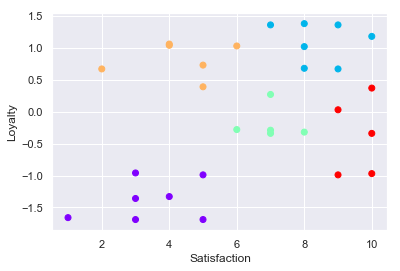

In [14]:
plt.scatter(cluster_new['Satisfaction'],cluster_new['Loyalty'],c=cluster_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [17]:
 data = pd.read_csv('Country clusters standardized.csv', index_col='Country')

In [18]:
data

,Latitude,Longitude,Language
Country,,,
USA,0.186540,-1.089160,0
Canada,0.728588,-1.008604,0
France,0.241895,0.137900,1
UK,0.467671,0.080922,0
Germany,0.378729,0.230360,2
Australia,-2.003422,1.648581,0


In [20]:
x_scaled = data.copy()
x_scaled = x_scaled.drop(['Language'], axis = 1)

In [21]:
x_scaled

,Latitude,Longitude
Country,,
USA,0.186540,-1.089160
Canada,0.728588,-1.008604
France,0.241895,0.137900
UK,0.467671,0.080922
Germany,0.378729,0.230360
Australia,-2.003422,1.648581


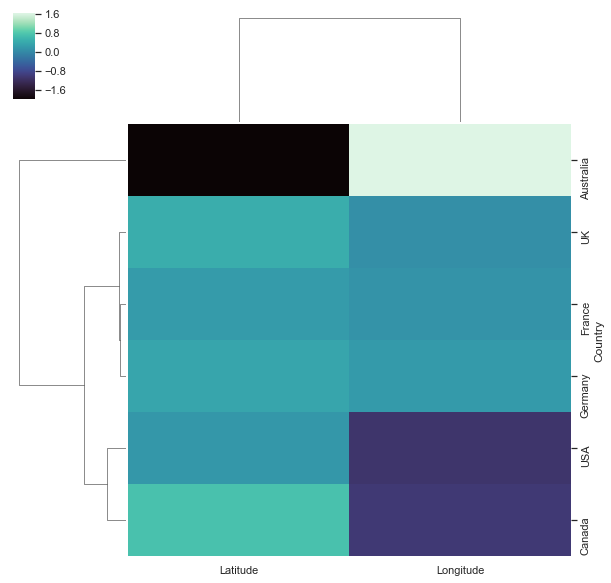

In [23]:
sns.clustermap(x_scaled, cmap='mako')

In [ ]:
data = pd.read_csv('3.12. Example.csv')
x = data.copy()
kmeans = KMeans(2)
kmeans.fit(x)
clusters = x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## for WCSS and elbow plot
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

wcss=[]

for i in range (1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
wcss
plt.plot(range(1,10),wcss)
plt.xlabel('number of clusters')
plt.ylabel('wcss')

## 

kmeans_new = KMeans(5)
kmeans_new.fit(x_scaled)
cluster_new = x.copy()
cluster_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
cluster_new

kmeans_new = KMeans(5)
kmeans_new.fit(x_scaled)
cluster_new = x.copy()
cluster_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
cluster_new